<a href="https://colab.research.google.com/github/Iana-Neri22/AnalyticsStudies/blob/master/analise_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

dict_colunas = {
    'UF': 'UF',
    'A002': 'Idade', 
    'A003': 'Sexo', 
    'A005': 'Escolaridade',
    'B0011': 'Febre', 
    'B0012': 'Tosse',
    'B0013': 'Dor_Garganta',
    'B0014': 'Dificuldade_Respirar',
    'B0016': 'Dor_Peito',
    'B0017': 'Nausea',
    'B0018': 'Nariz_Entupido',
    'B0019': 'Fadiga',
    'B00110': 'Dor_Olhos',
    'B00111': 'Perda_Cheiro_Sabor', 
    'B00112': 'Dor_Muscular', 
    'B002': 'Buscou_Estabelecimento_Saude',
    'B0031': 'Ficou_Casa', 
    'B0032': 'Ligar_Profissional_Saude', 
    'B0033': 'Remedio_Conta_Propria',
    'B0034': 'Remedio_Orientacao_Medica', 
    'B0035': 'Visita_Profissional_SUS', 
    'B0036': 'Visita_Profissional_Particular',
    'B0037': 'Outra_Medida_Recuperacao', 
    'B0042': 'Atendimento_PS_SUS_UPA', 
    'B0043': 'Atendimento_Hospital_SUS',
    'B0044': 'Atendimento_Ambulatorio_Consultorio_Privado_Forcas_Armadas', 
    'B0045': 'PS_Privado_Forcas_Armadas', 
    'B0046': 'Hospital_Privado_Forcas_Armadas',
    'B005': 'Internacao', 
    'B006': 'Internacao_Respiracao_Artifical', 
    'B007': 'Possui_Plano_Saude',
    'C001': 'Trabalhou', 
    'C002': 'Afastado', 
    'C003': 'Motivo_Afastamento',
    'C004': 'Continuou_Remunerado',
    'C005': 'Tempo_Afastamento', 
    'C006': 'Tem_Mais_Um_Trabalho',
    'C007': 'Tipo_Emprego', 
    'C007A': 'Area_Trabalho', 
    'C007B': 'Tipo_Vinculo_Empregaticio',
    'C007C': 'Cargo_Trabalho', 
    'C007D': 'Atividade_Trabalho', 
    'C007E': 'Numero_Funcionarios_Empresa',
    'C008': 'Horas_Trabalho_Semana', 
    'C011A11': 'Faixa_Rendimento', 
    'C013': 'Home_Office',
    'B0018': 'Nariz_Entupido', 
    'B0019': 'Fadiga',
    'B00110': 'Dor_Olhos',
    'V1013': 'Mes_Pesquisa'
}

dict_uf = {
    11: 'RO',
    12:	'AC',
    13: 'AM',
    14: 'RR',
    15:	'PA',
    16: 'AP',
    17: 'TO',
    21: 'MA',
    22:	'PI',
    23: 'CE',
    24:	'RN',
    25: 'PB',
    26: 'PE',
    27: 'AL',
    28:	'SE',
    29:	'BA',
    31:	'MG',
    32:	'ES',
    33:	'RJ',
    35:	'SP',
    41:	'PR',
    42:	'SC',
    43:	'RS',
    50:	'MS',
    51:	'MT',
    52:	'GO',
    53:	'DF'
}

dict_mes = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

lista_colunas = list(dict_colunas.keys())

# Path de todos os arquivos csv para análise
caminho_arquivos = './Datasets'
# Armazenando o path de cada arquivo
if not os.path.exists(f'{caminho_arquivos}/DadosCovidCompilados.csv.'):
    dados_por_mes = glob.glob(os.path.join(caminho_arquivos, "*.csv"))

    # Unindo todos os arquivos em um único dataframe
    df = pd.concat((pd.read_csv(f) for f in dados_por_mes), ignore_index=True)
    df.to_csv(f'{caminho_arquivos}/DadosCovidCompilados.csv') 
df = pd.read_csv(f'{caminho_arquivos}/DadosCovidCompilados.csv', usecols=lista_colunas)

In [165]:

df = df.rename(columns=dict_colunas)

lista_colunas = list(dict_colunas.values())
df = df.replace({"UF": dict_uf})
df = df[lista_colunas]

df = df.dropna(subset=["UF".strip()])

df.head()

,UF,Idade,Sexo,Escolaridade,Febre,Tosse,Dor_Garganta,Dificuldade_Respirar,Dor_Peito,Nausea,...,Tipo_Emprego,Area_Trabalho,Tipo_Vinculo_Empregaticio,Cargo_Trabalho,Atividade_Trabalho,Numero_Funcionarios_Empresa,Horas_Trabalho_Semana,Faixa_Rendimento,Home_Office,Mes_Pesquisa
0,RO,35,1,5,2,2,2,2,2,2,...,4.0,NaN,1.0,35.0,6.0,NaN,48.0,4.0,NaN,6
1,RO,29,2,7,2,2,2,2,2,2,...,7.0,NaN,NaN,34.0,22.0,NaN,40.0,0.0,NaN,6
2,RO,13,1,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,RO,10,1,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,RO,57,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [112]:
df.tail()

,UF,Idade,Sexo,Escolaridade,Febre,Tosse,Dor_Garganta,Dificuldade_Respirar,Dor_Peito,Nausea,...,Tipo_Emprego,Area_Trabalho,Tipo_Vinculo_Empregaticio,Cargo_Trabalho,Atividade_Trabalho,Numero_Funcionarios_Empresa,Horas_Trabalho_Semana,Faixa_Rendimento,Home_Office,Mes_Pesquisa
2301148,DF,45,2,3,2,2,2,2,2,2,...,4.0,NaN,1.0,2.0,17.0,NaN,40.0,4.0,NaN,11
2301149,DF,22,2,7,2,2,2,2,2,2,...,7.0,NaN,NaN,8.0,6.0,NaN,40.0,4.0,NaN,11
2301150,DF,16,2,3,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
2301151,DF,83,1,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
2301152,DF,75,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [113]:
print(f'Nº de Linhas: {df.shape[0]}')
print(f'Nº de Colunas: {df.shape[1]}')

#Tipo das variáveis
df.dtypes.sort_values(ascending=False)

Nº de Linhas: 2301153
Nº de Colunas: 47


UF                                                             object
Atendimento_Hospital_SUS                                      float64
PS_Privado_Forcas_Armadas                                     float64
Hospital_Privado_Forcas_Armadas                               float64
Internacao                                                    float64
Internacao_Respiracao_Artifical                               float64
Trabalhou                                                     float64
Afastado                                                      float64
Motivo_Afastamento                                            float64
Continuou_Remunerado                                          float64
Tempo_Afastamento                                             float64
Tem_Mais_Um_Trabalho                                          float64
Tipo_Emprego                                                  float64
Area_Trabalho                                                 float64
Tipo_Vinculo_Emprega

In [114]:
#Verificando valores ausentes do df (isnull().sum())
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Internacao_Respiracao_Artifical                               0.999425
Internacao                                                    0.994405
Numero_Funcionarios_Empresa                                   0.988283
Atendimento_Hospital_SUS                                      0.987578
Hospital_Privado_Forcas_Armadas                               0.987578
PS_Privado_Forcas_Armadas                                     0.987578
Atendimento_Ambulatorio_Consultorio_Privado_Forcas_Armadas    0.987578
Atendimento_PS_SUS_UPA                                        0.987578
Tempo_Afastamento                                             0.975300
Continuou_Remunerado                                          0.965407
Remedio_Orientacao_Medica                                     0.959765
Visita_Profissional_SUS                                       0.959765
Outra_Medida_Recuperacao                                      0.959765
Visita_Profissional_Particular                                0.959765
Ficou_

In [115]:
df.head()

,UF,Idade,Sexo,Escolaridade,Febre,Tosse,Dor_Garganta,Dificuldade_Respirar,Dor_Peito,Nausea,...,Tipo_Emprego,Area_Trabalho,Tipo_Vinculo_Empregaticio,Cargo_Trabalho,Atividade_Trabalho,Numero_Funcionarios_Empresa,Horas_Trabalho_Semana,Faixa_Rendimento,Home_Office,Mes_Pesquisa
0,RO,35,1,5,2,2,2,2,2,2,...,4.0,NaN,1.0,35.0,6.0,NaN,48.0,4.0,NaN,6
1,RO,29,2,7,2,2,2,2,2,2,...,7.0,NaN,NaN,34.0,22.0,NaN,40.0,0.0,NaN,6
2,RO,13,1,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,RO,10,1,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,RO,57,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [116]:
print('Início: ', df.Mes_Pesquisa.min())
print('Fim: ', df.Mes_Pesquisa.max())

Início:  6
Fim:  11


In [117]:
#Resumo do nosso dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301153 entries, 0 to 2301152
Data columns (total 47 columns):
 #   Column                                                      Dtype  
---  ------                                                      -----  
 0   UF                                                          object 
 1   Idade                                                       int64  
 2   Sexo                                                        int64  
 3   Escolaridade                                                int64  
 4   Febre                                                       int64  
 5   Tosse                                                       int64  
 6   Dor_Garganta                                                int64  
 7   Dificuldade_Respirar                                        int64  
 8   Dor_Peito                                                   int64  
 9   Nausea                                                      int64  
 10  Nariz_

In [164]:
# Mostrar os estados presentes na pesquisa
print(f'Os países afetados pelo corona vírus são: {df["UF"].unique()}')

Os países afetados pelo corona vírus são: ['RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'RN' 'PB' 'PE' 'AL'
 'SE' 'BA' 'MG' 'ES' 'RJ' 'SP' 'PR' 'SC' 'RS' 'MS' 'MT' 'GO' 'DF']


In [173]:
# Total de UF presentes na pesquisa 

print(f'Ao total {len(df["UF"].unique())} UF participaram da pesquisa.')

Ao total 27 UF participaram da pesquisa.


In [200]:
# Quais estados tiveram o maior número de entrevistados?
entrevistados_uf = df.groupby(['UF'])['Mes_Pesquisa'].count()
entrevistados_uf = pd.DataFrame({'UF': entrevistados_uf.index, 'Total de Entrevistados':entrevistados_uf.values})
entrevistados_uf = entrevistados_uf.replace({"Mês": dict_mes})
entrevistados_uf = entrevistados_uf.sort_values(by=['Total de Entrevistados', 'UF'], ascending=[False, True])
display(entrevistados_uf)

,UF,Total de Entrevistados
10,MG,207266
25,SP,202577
18,RJ,173953
23,SC,141355
22,RS,133361
17,PR,120473
9,MA,118680
4,BA,103685
5,CE,102223
15,PE,99381


<Axes: xlabel='UF'>

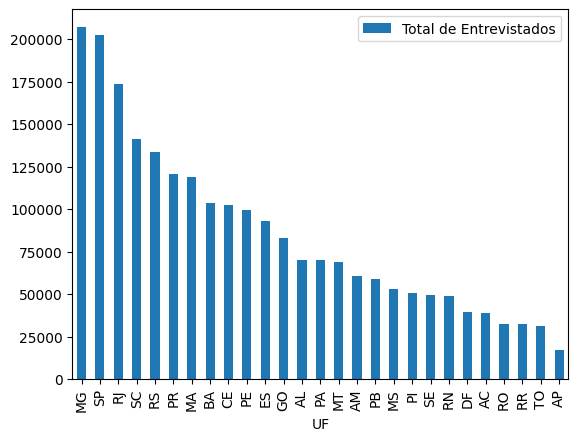

In [211]:
entrevistados_uf.plot(x="UF", y="Total de Entrevistados", kind='bar')

In [118]:
evolucao = df.groupby(['Mes_Pesquisa'])['UF'].count()
evolucao = pd.DataFrame({'Mês': evolucao.index, 'Entrevistados':evolucao.values})
evolucao = evolucao.replace({"Mês": dict_mes})
evolucao.head()

,Mês,Entrevistados
0,Junho,381270
1,Julho,384166
2,Agosto,386520
3,Setembro,387298
4,Outubro,380461


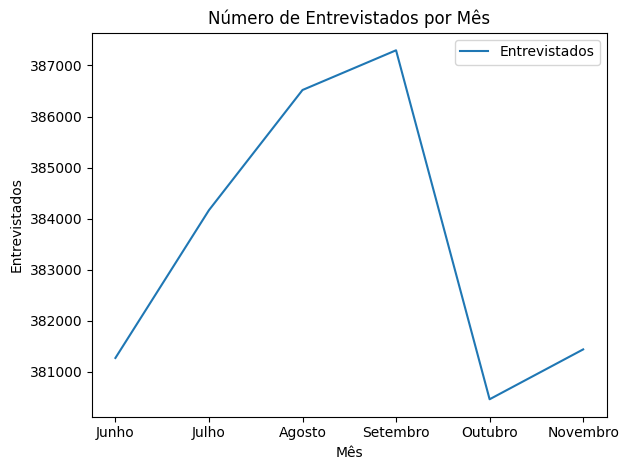

In [158]:
#fig, ax = plt.subplots(figsize = (15,5))

#df.plot(evolucao['Mês'],y=evolucao['Entrevistados'])
evolucao.plot(x="Mês", y="Entrevistados", kind="line") 
#plt(evolucao)  
plt.xlabel('Mês')
plt.ylabel('Entrevistados') 
plt.title('Número de Entrevistados por Mês')
plt.legend() 


#evolucao.plot(kind='line', marker='o', ax=ax)
#ax.set_title('Evolução de casos do coronavírus')
#ax.set_xlabel('Data')
#ax.set_ylabel('Quantidade de casos')
plt.tight_layout()
